# DARE-Newcrest data challenge - flotation plant dataset
DARE 2022

In this notebook, we will provide a template for the DARE-Newcrest data challenge. The main steps covered here will be:

- Load the data
- Provide an overview of what is in the data
- Provide an example of a terribly performing baseline model
- Provide functions to quantify model predictive performance

In [ ]:
colab = False
if colab:
    !git clone https://github.com/dare-centre/newcrest-data-challenge
    import os
    os.chdir('newcrest-data-challenge')
    !ls

In [15]:
# magic
%load_ext autoreload
%autoreload 2
%pdb 0
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Automatic pdb calling has been turned ON


## Imports and settings
Everything we need to get started.

In [16]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# plotting
from functions.plotting_functions import (plot_model_fit) 
# helper
from functions.helper_functions import (assess_model_prediction, inversescaler_pred_dict)
# data
from functions.data_functions import(load_hourly_data) 

## Load the data


In [17]:
train_val_x, train_val_y, test_x_all, test_y = load_hourly_data()

train_val_x.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-29 12:00:00,60.18,9.34,1060.859297,379.836203,400.982539,9.527187,1.550374,200.035839,195.577700,199.983717,...,250.069722,249.992956,753.724247,726.559437,860.557818,477.349197,452.512522,478.219647,470.105547,66.44
2017-03-29 13:00:00,60.18,9.34,2034.926525,322.233975,400.468947,9.700679,1.532017,199.990122,195.106250,199.765344,...,250.029056,250.059711,848.675503,777.784437,869.419421,483.816131,469.448172,471.607075,462.665478,66.57
2017-03-29 14:00:00,60.18,9.34,1435.425811,474.656322,399.157083,9.687788,1.645200,200.019311,195.604928,199.925800,...,249.979356,250.111328,851.951492,776.293654,879.704989,456.147231,453.227000,447.708467,453.475667,66.64
2017-03-29 15:00:00,60.18,9.34,618.460387,396.377733,398.942522,9.851689,1.559929,199.940833,195.657094,200.044339,...,249.978589,250.028506,855.910630,780.369869,882.093896,449.410744,448.581506,450.697578,448.660094,66.41
2017-03-29 16:00:00,59.54,9.56,1367.502858,317.134072,400.836283,9.936163,1.530984,199.878922,196.162864,199.905467,...,250.061661,250.122067,851.603513,784.446084,884.840698,450.123050,451.774694,451.574422,449.406894,63.63


In [18]:
# lets look at some properties of the data 
print('Number of features: {}'.format(train_val_x.shape[1]))
print('Number of training observations: {}'.format(train_val_x.shape[0]))
print('Number of test observations: {}'.format(test_x_all.shape[0]))
print('Feature names: {}'.format(test_x_all.columns.tolist()))
print('Predict variable: {}'.format(train_val_y.columns.tolist()))

Number of features: 22
Number of training observations: 2984
Number of test observations: 891
Feature names: ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level', '% Iron Concentrate']
Predict variable: ['% Silica Concentrate']


## Split our training data into training and validation sets
We can either split this randomly if we are just modelling as a plain regression problem (set `shuffle = True`), or we can split it sequentially if we are modelling as a time series problem (set `shuffle = False`).


In [19]:
# randomly or sequentially split the data into training and validation sets
val_split = False # there is no benefit to using a validation in our simple linear model
shuffle = True

if val_split:
    train_x_all, val_x_all, train_y, val_y = train_test_split(train_val_x, train_val_y, test_size=0.2, shuffle=shuffle)
else:
    train_x_all = train_val_x
    train_y = train_val_y
    val_x_all = None
    val_y = None

# create placeholders for our model predictions
train_y_pred = None
val_y_pred = None
test_y_pred = None


## Select predictors
We will use the very simplistic approach of just assessing the correlation to the target variable and selecting the most useful features.

In [20]:
top_n = 5 # select the top n features - use None for all features

if top_n is not None:
    ## YOUR CODE HERE
    # you can use your own code here to find the optimal features

    # example with simpler correlation approach
    # select the top n features
    corr_df = pd.concat([train_x_all, train_y], axis=1).corr().abs().drop(['% Silica Concentrate'], axis=0)
    # print the top n predictors
    print(corr_df['% Silica Concentrate'].sort_values(ascending=False).head(top_n))
    top_n_features = corr_df['% Silica Concentrate'].sort_values(ascending=False).head(top_n).index.tolist()
    ## END CODE
else:
    # use all features
    top_n_features = train_x_all.columns.tolist()

# Now 
train_x = train_x_all[top_n_features]
train_time = train_x_all.index
test_x = test_x_all[top_n_features]
test_time = test_x_all.index
if val_split:
    val_x = val_x_all[top_n_features]
    val_time = val_x_all.index
else:
    val_x = None
    val_time = None


% Iron Concentrate              0.802415
Flotation Column 01 Air Flow    0.271290
Flotation Column 03 Air Flow    0.269128
Flotation Column 02 Air Flow    0.229662
Flotation Column 05 Level       0.222272
Name: % Silica Concentrate, dtype: float64


## Scale the data if needed

In [21]:
use_scaler = True

if use_scaler:
    # standardise the data for better performance
    scaler_x = StandardScaler()
    train_x = scaler_x.fit_transform(train_x)
    test_x = scaler_x.transform(test_x)
    if val_split:
        val_x = scaler_x.transform(val_x)

    scaler_y = StandardScaler()
    train_y = scaler_y.fit_transform(train_y)
    test_y = scaler_y.transform(test_y)
    if val_split:
        val_y = scaler_y.transform(val_y)

else:
    scaler_x = None
    scaler_y = None
    # easier if they're all numpy arrays from this point in
    train_x = train_x.values
    test_x = test_x.values
    if val_split:
        val_x = val_x.values
    train_y = train_y.values
    test_y = test_y.values
    if val_split:
        val_y = val_y.values

## Train a model
We will use a simple linear regression model as a baseline. You can implement your own model here.

In [22]:
import sklearn.linear_model as lm
from sklearn.neural_network import MLPRegressor

In [23]:
## YOUR CODE HERE

# fit a linear model to the data
model = lm.LinearRegression()
model.fit(train_x,train_y)

# fit a neural network to the data
# model = MLPRegressor(
#     hidden_layer_sizes=(100,20), max_iter=1000,
#     activation='relu', solver='adam',
# )
# model.fit(train_x,train_y.squeeze())

# predict on data
train_y_pred = model.predict(train_x)
test_y_pred = model.predict(test_x)
if not val_x is None:
    val_y_pred = model.predict(val_x)

## END CODE

## Assess model performance

When calling the `assess_model_prediction`, we will leave `test=False` so that the test data are unseen (honesty system!) until the end of the data challenge. This is to ensure that we don't just overfit the model to the test data. When making your final model run, please set `test=True` to get a final assessment of your model performance. 

In [24]:
# construct the dict of data for plotting and metrics
data_dict = {
    'train_time': train_time,
    'train_y': train_y,
    'train_y_pred': train_y_pred,
    'test_time': test_time,
    'test_y': test_y,
    'test_y_pred': test_y_pred,
    'val_time': val_time,
    'val_y': val_y,
    'val_y_pred': val_y_pred,
}
predicted_data  = inversescaler_pred_dict(data_dict, scaler=scaler_y)

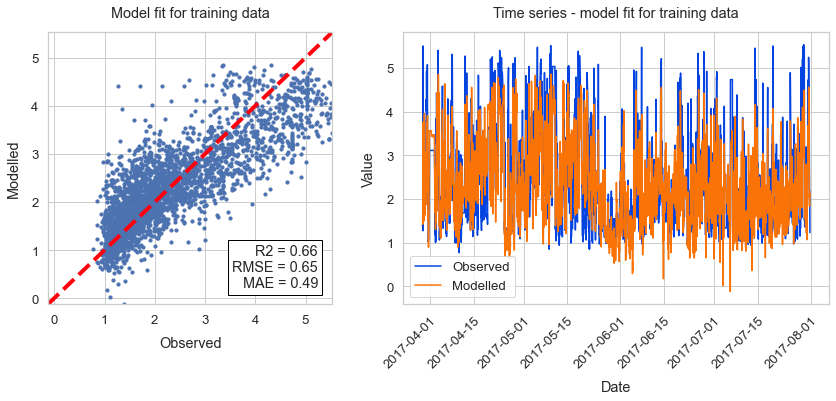

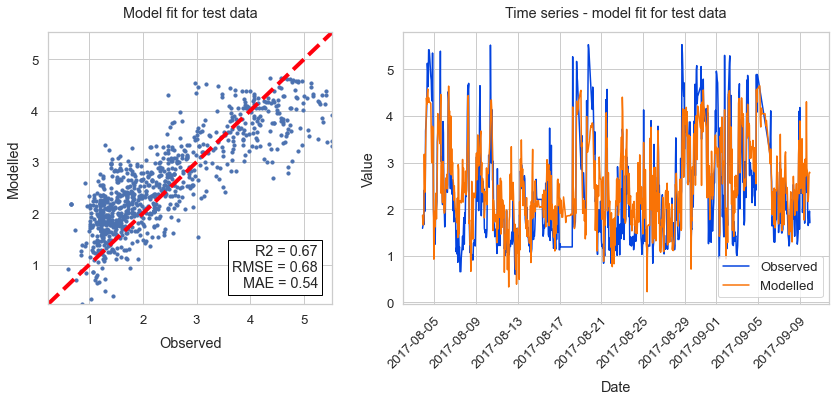

Model performance metrics:


,train,val,test
r2,0.664052,None,0.667274
rmse,0.646717,None,0.678051
mae,0.494715,None,0.541553


In [26]:
# plot the model performance and get metrics
metrics = assess_model_prediction(predicted_data,test=False)
print('Model performance metrics:')
metrics